In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn import preprocessing
from sklearn import utils
from sklearn.model_selection import GridSearchCV
import xgboost as xgb
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor
from sklearn.ensemble import VotingRegressor
from sklearn.ensemble import StackingRegressor
from sklearn import svm
from sklearn.model_selection import cross_val_score

sequential_data = np.load("Signals.npz", allow_pickle=True)["a"].item()
train_data = pd.read_csv("metadata_train.csv")

#test_data = pd.read_csv("metadata_test.csv")

y = train_data['CycleToFailureNormalized']




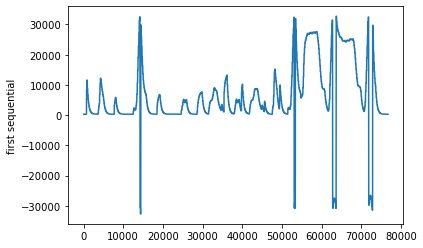

In [21]:
train_index = train_data["SignalID"].to_numpy()
tab1 = []

dlugosc = []
max_val = []
min_val = []

#for smallest(a) to highest(e) of values
amount_e = []
amount_d = []
amount_c = []
amount_b = []
amount_a = []

#for smallest(a) to highest(e) of values
density_amount_e = []
density_amount_d = []
density_amount_c = []
density_amount_b = []
density_amount_a = []

#for smallest(a) to highest(d) of values
num_of_a_changes = []
num_of_b_changes = []
num_of_c_changes = []
num_of_d_changes = []

# standard deviation
std = []
extreme_changes = []
std_a = []
std_b = []
std_c = []
for x in train_index:
    tab1.append(sequential_data[x])
    dlugosc.append(len(sequential_data[x]))
    max_val.append(np.amax(sequential_data[x],axis=0))
    min_val.append(np.amin(sequential_data[x],axis=0))

    amount_e.append((sequential_data[x] >20650).sum())
    amount_d.append(((15000<=sequential_data[x]) &(sequential_data[x] <=20650)).sum())
    amount_c.append(((12500<=sequential_data[x]) &(sequential_data[x] <20650)).sum())
    amount_b.append(((2500<=sequential_data[x]) &(sequential_data[x] <10000)).sum())
    amount_a.append((sequential_data[x] <0).sum())

    density_amount_e.append(((20750<=sequential_data[x])).sum()/len(sequential_data[x]))
    density_amount_d.append(((15000<=sequential_data[x]) &(sequential_data[x] <=20750)).sum()/len(sequential_data[x]))
    density_amount_c.append(((9500<=sequential_data[x]) &(sequential_data[x] <15000)).sum()/len(sequential_data[x]))
    density_amount_b.append(((5000<=sequential_data[x]) &(sequential_data[x] <9500)).sum()/len(sequential_data[x]))
    density_amount_a.append(((0<sequential_data[x]) &(sequential_data[x] <5000)).sum()/len(sequential_data[x]))

    num_of_a_changes.append(((0<np.absolute(np.diff(sequential_data[x]))) &(np.absolute(np.diff(sequential_data[x]) <=155))).sum())
    num_of_b_changes.append(((1500<np.absolute(np.diff(sequential_data[x]))) &(np.absolute(np.diff(sequential_data[x]) <=2500))).sum())
    num_of_c_changes.append(((2500<np.absolute(np.diff(sequential_data[x]))) &(np.absolute(np.diff(sequential_data[x]) <=4000))).sum())
    num_of_d_changes.append(((4000<np.absolute(np.diff(sequential_data[x])))).sum())

    a,b,c = np.array_split(sequential_data[x],3)
    std_a.append(np.std(a,axis=0))
    std_b.append(np.std(b,axis=0))
    std_c.append(np.std(c,axis=0))

    a,b,c,d,e,f,g,h,i,j,k,l,m,n,o,p,r,s,t,u = np.array_split(sequential_data[x],20)
    std = np.array([np.std(a,axis=0),np.std(b,axis=0),np.std(c,axis=0),np.std(d,axis=0),np.std(e,axis=0),np.std(f,axis=0),np.std(g,axis=0),np.std(h,axis=0),np.std(i,axis=0),np.std(j,axis=0),
                    np.std(k,axis=0),np.std(l,axis=0),np.std(m,axis=0),np.std(n,axis=0),np.std(o,axis=0),
                    np.std(p,axis=0),np.std(r,axis=0),np.std(s,axis=0),np.std(t,axis=0),np.std(u,axis=0)])

    if (np.max(std)-np.min(std))>8000:
        extreme_changes.append(int(np.max(std)-np.min(std)))
    else:
        extreme_changes.append(int(0))


    



#print(num_of_d_changes)
#print(num_of_1000_2500_changes)
#print(num_of_2500_5000_changes)
#print(num_of_5000_8000_changes)
#print(num_of_above_8000_changes)


#print("###########33")
#train_data["sequential_data"] = tab1


#data = train_data["sequential_data"]
#for key, value in data.items():
#    np.savetxt("abc.csv",value, delimiter=',')

 
train_data["dlugosc"] = dlugosc
train_data["max_val"] = max_val
train_data["min_val"] = min_val

train_data["1/3 odchylenie standardowe"] = std_a
train_data["2/3 odchylenie standardowe"] = std_b
train_data["3/3 odchylenie standardowe"] = std_c

train_data["amount_e"] = amount_e
train_data["amount_d"] = amount_d
train_data["amount_c"] = amount_c
train_data["amount_b"] = amount_b
train_data["amount_a"] = amount_a

train_data["density_amount_e"] = density_amount_e
train_data["density_amount_d"] = density_amount_d
train_data["density_amount_c"] = density_amount_c
train_data["density_amount_b"] = density_amount_b
train_data["density_amount_a"] = density_amount_a

train_data["num_of_a_changes"] = num_of_a_changes
train_data["num_of_b_changes"] = num_of_b_changes
train_data["num_of_c_changes"] = num_of_c_changes
train_data["num_of_d_changes"] = num_of_d_changes

train_data["extreme_changes"] = extreme_changes


plt.plot(tab1[86])
plt.ylabel('first sequential')
plt.show()

In [22]:
y = train_data['CycleToFailureNormalized']


corr_matrix = train_data.corr()
print("W POSZUKIWANIU KORELACJI (PEARSON)")
print("\n")
print(corr_matrix["CycleToFailureNormalized"].sort_values(ascending=False))

W POSZUKIWANIU KORELACJI (PEARSON)


CycleToFailureNormalized      1.000000
density_amount_a              0.477482
density_amount_b              0.415135
min_val                       0.272281
amount_b                      0.269452
num_of_a_changes              0.096175
dlugosc                       0.054364
HardnessMean [HRC]            0.036656
RDOC [mm]                     0.001255
ToolIndex                    -0.002362
ADOC [mm]                    -0.012465
ToolHolderLength [mm]        -0.017388
amount_a                     -0.173562
1/3 odchylenie standardowe   -0.194780
num_of_b_changes             -0.257065
num_of_d_changes             -0.267399
num_of_c_changes             -0.355111
extreme_changes              -0.358232
SignalID                     -0.366419
amount_d                     -0.370394
density_amount_d             -0.397599
density_amount_c             -0.404072
density_amount_e             -0.419552
amount_e                     -0.425769
amount_c                   

In [23]:
X = train_data

####################################################################################
# PORZUCANIE SŁABO SKORELOWANYCH ZMIENNYCH 

#train_data.drop('CycleToFailureNormalized', inplace=True, axis=1)
#train_data.drop('ToolRotation [rpm]', inplace=True, axis=1)
#train_data.drop('FeedRate [mm/min]', inplace=True, axis=1)
#train_data.drop('ToolIndex', inplace=True, axis=1)
#train_data.drop('RDOC [mm]', inplace=True, axis=1)
#train_data.drop('ToolDiameter [mm]', inplace=True, axis=1)
#train_data.drop('ADOC [mm]', inplace=True, axis=1)
#train_data.drop('ToolHolderLength [mm]', inplace=True, axis=1)
#train_data.drop('max_val', inplace=True, axis=1)
#train_data.drop('min_val', inplace=True, axis=1)

#print(train_data.shape)
#print(X.head())

In [24]:
corr_matrix = train_data.corr()
print("W POSZUKIWANIU KORELACJI (PEARSON)")
print("\n")
print(corr_matrix["CycleToFailureNormalized"].sort_values(ascending=False))

W POSZUKIWANIU KORELACJI (PEARSON)


CycleToFailureNormalized      1.000000
density_amount_a              0.477482
density_amount_b              0.415135
min_val                       0.272281
amount_b                      0.269452
num_of_a_changes              0.096175
dlugosc                       0.054364
HardnessMean [HRC]            0.036656
RDOC [mm]                     0.001255
ToolIndex                    -0.002362
ADOC [mm]                    -0.012465
ToolHolderLength [mm]        -0.017388
amount_a                     -0.173562
1/3 odchylenie standardowe   -0.194780
num_of_b_changes             -0.257065
num_of_d_changes             -0.267399
num_of_c_changes             -0.355111
extreme_changes              -0.358232
SignalID                     -0.366419
amount_d                     -0.370394
density_amount_d             -0.397599
density_amount_c             -0.404072
density_amount_e             -0.419552
amount_e                     -0.425769
amount_c                   

In [25]:
#print(X.head())
X.drop('CycleToFailureNormalized', inplace=True, axis=1)
X.drop('SignalID', inplace=True, axis=1)
X.drop('ToolIndex', inplace=True, axis=1)
print(X.head())

   ADOC [mm]  RDOC [mm]  HardnessMean [HRC]  ToolHolderLength [mm]  \
0          5        8.0               36.67                     80   
1          5        8.0               36.67                     80   
2          5        8.0               36.67                     80   
3          5        8.0               36.67                     80   
4          5        8.0               36.67                     80   

   ToolRotation [rpm]  FeedRate [mm/min]  ToolDiameter [mm]  dlugosc  max_val  \
0                3200                640                 10    53965    12854   
1                3200                640                 10    31815    13385   
2                3200                640                 10    40706    18546   
3                3200                640                 10    36637     9360   
4                3200                640                 10    56097    15579   

   min_val  ...  density_amount_e  density_amount_d  density_amount_c  \
0      296  ...    

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X.values, y.values, test_size=0.1, random_state= None)

#print(X_train.shape); print(X_test.shape)



"""
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
"""

Scaler = MinMaxScaler()
Scaler.fit(X_train)
X_train = Scaler.transform(X_train)
X_test = Scaler.transform(X_test)


############################################################3
print(X.shape)
print(X_train.shape)
#print(X_train.mean(axis=0))
#print(X_test.shape)

(616, 28)
(554, 28)


In [27]:
def algorithm_pipeline(X_train_data, X_test_data, y_train_data, y_test_data, 
                       model, param_grid, cv=10, scoring_fit='r2',
                       do_probabilities = False):
    gs = GridSearchCV(
        estimator=model,
        param_grid=param_grid, 
        cv=cv, 
        n_jobs=-1, 
        scoring=scoring_fit,
        verbose=2
    )
    fitted_model = gs.fit(X_train_data, y_train_data)
    
    if do_probabilities:
      pred = fitted_model.predict_proba(X_test_data)
    else:
      pred = fitted_model.predict(X_test_data)
    
    return fitted_model, pred

In [28]:
#model = ExtraTreesRegressor(n_estimators=100, n_jobs=4, min_samples_split=25,
#                            min_samples_leaf=35, max_features=150)

"""model = ExtraTreesRegressor()
param_grid = {
    'n_estimators': [100,150,300],
    'min_samples_split': [2,4,8,12],
    'max_depth':[10,20,35,50],
    'min_samples_leaf':[2,3,4],
    'n_jobs':[-1,3,5,10]
}

model, pred = algorithm_pipeline(X_train, X_test, y_train, y_test, model, 
                                 param_grid, cv=5, scoring_fit='r2')

print(model.best_score_)
print(model.best_params_) """                           

"model = ExtraTreesRegressor()\nparam_grid = {\n    'n_estimators': [100,150,300],\n    'min_samples_split': [2,4,8,12],\n    'max_depth':[10,20,35,50],\n    'min_samples_leaf':[2,3,4],\n    'n_jobs':[-1,3,5,10]\n}\n\nmodel, pred = algorithm_pipeline(X_train, X_test, y_train, y_test, model, \n                                 param_grid, cv=5, scoring_fit='r2')\n\nprint(model.best_score_)\nprint(model.best_params_) "

In [29]:
"""model = RandomForestRegressor()
param_grid = {
    'n_estimators': [60,75,100,110],
    'max_depth':[10,20,25,30],
    'n_jobs':[3,5,6,7],
    'min_samples_leaf': [1,3,5,10]

}

model, pred = algorithm_pipeline(X_train, X_test, y_train, y_test, model, 
                                 param_grid, cv=5, scoring_fit='r2')

print(model.best_score_)
print(model.best_params_)
print(model.best_estimator_)


RFR = RandomForestRegressor(n_estimators= 100, max_depth=30, n_jobs=5, min_samples_split=2,min_samples_leaf=1)
                           
RFR.fit(X_train, y_train)
pred5 = RFR.predict(X_test)
print("Accuracy on test set for RFR: %.2f" % (r2_score(y_test, pred5) * 100))"""

'model = RandomForestRegressor()\nparam_grid = {\n    \'n_estimators\': [60,75,100,110],\n    \'max_depth\':[10,20,25,30],\n    \'n_jobs\':[3,5,6,7],\n    \'min_samples_leaf\': [1,3,5,10]\n\n}\n\nmodel, pred = algorithm_pipeline(X_train, X_test, y_train, y_test, model, \n                                 param_grid, cv=5, scoring_fit=\'r2\')\n\nprint(model.best_score_)\nprint(model.best_params_)\nprint(model.best_estimator_)\n\n\nRFR = RandomForestRegressor(n_estimators= 100, max_depth=30, n_jobs=5, min_samples_split=2,min_samples_leaf=1)\n                           \nRFR.fit(X_train, y_train)\npred5 = RFR.predict(X_test)\nprint("Accuracy on test set for RFR: %.2f" % (r2_score(y_test, pred5) * 100))'

In [30]:
"""model = XGBRegressor()
param_grid = {
    'n_estimators': [150,300,400,500],
    'min_samples_split': [2,3,4],
    'max_depth':[5,10,15,20],
    'learning_rate': [0.2,0.15,0.25,0.12],
    'subsample':[0.95,0.9,0.85]
}

model, pred = algorithm_pipeline(X_train, X_test, y_train, y_test, model, 
                                 param_grid, cv=5, scoring_fit='r2')

print(model.best_score_)
print(model.best_params_)
print(model.best_estimator_)

###################################################################################

XGB = XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.12, max_delta_step=0,
             max_depth=5, min_child_weight=1, min_samples_split=2, missing=nan,
             monotone_constraints='()', n_estimators=300, n_jobs=4,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=0.85,
             tree_method='exact', validate_parameters=1, verbosity=None)
XGB = XGB.fit(X_train, y_train)
pred2 = XGB.predict(X_test)
print("Accuracy on test set for XGB: %.2f" % (r2_score(y_test, pred2)*100))"""


'model = XGBRegressor()\nparam_grid = {\n    \'n_estimators\': [150,300,400,500],\n    \'min_samples_split\': [2,3,4],\n    \'max_depth\':[5,10,15,20],\n    \'learning_rate\': [0.2,0.15,0.25,0.12],\n    \'subsample\':[0.95,0.9,0.85]\n}\n\nmodel, pred = algorithm_pipeline(X_train, X_test, y_train, y_test, model, \n                                 param_grid, cv=5, scoring_fit=\'r2\')\n\nprint(model.best_score_)\nprint(model.best_params_)\nprint(model.best_estimator_)\n\n###################################################################################\n\nXGB = XGBRegressor(base_score=0.5, booster=\'gbtree\', colsample_bylevel=1,\n             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,\n             gamma=0, gpu_id=-1, importance_type=None,\n             interaction_constraints=\'\', learning_rate=0.12, max_delta_step=0,\n             max_depth=5, min_child_weight=1, min_samples_split=2, missing=nan,\n             monotone_constraints=\'()\', n_estimators=300, n_j

In [31]:
"""model = svm.SVR()
param_grid = {
    'degree': [2,3,4,5,6],
    #'kernel': ["poly","rbf","sigmoid","precomputed"],
    "C":[0.8,0.9,1,1.1,1.2]
}

model, pred = algorithm_pipeline(X_train, X_test, y_train, y_test, model, 
                                 param_grid, cv=5, scoring_fit='r2')

print(model.best_score_)
print(model.best_params_)
print(model.best_estimator_)

###################################################################################

SVR = svm.SVR(C=1.2, degree=2)
SVR = SVR.fit(X_train, y_train)
pred2 = SVR.predict(X_test)
print("Accuracy on test set for XGB: %.2f" % (r2_score(y_test, pred2)*100))"""

'model = svm.SVR()\nparam_grid = {\n    \'degree\': [2,3,4,5,6],\n    #\'kernel\': ["poly","rbf","sigmoid","precomputed"],\n    "C":[0.8,0.9,1,1.1,1.2]\n}\n\nmodel, pred = algorithm_pipeline(X_train, X_test, y_train, y_test, model, \n                                 param_grid, cv=5, scoring_fit=\'r2\')\n\nprint(model.best_score_)\nprint(model.best_params_)\nprint(model.best_estimator_)\n\n###################################################################################\n\nSVR = svm.SVR(C=1.2, degree=2)\nSVR = SVR.fit(X_train, y_train)\npred2 = SVR.predict(X_test)\nprint("Accuracy on test set for XGB: %.2f" % (r2_score(y_test, pred2)*100))'

In [32]:
"""model =  DecisionTreeRegressor()

param_grid = {
    'min_samples_split': [4,6,10,12],
    'max_depth':[5,10,15,20,30],
    'max_leaf_nodes':[100,200,300]
    }

model, pred = algorithm_pipeline(X_train, X_test, y_train, y_test, model, 
                                 param_grid, cv=5, scoring_fit='r2')

print(model.best_score_)
print(model.best_params_)
print(model.best_estimator_)

###################################################################################

DecisionTreeRegressor(max_depth=15, max_leaf_nodes=300, min_samples_split=10)

DTR = DecisionTreeRegressor(max_depth=15, max_leaf_nodes=300, min_samples_split=10)
DTR = DTR.fit(X_train, y_train)
pred2 = DTR.predict(X_test)
print("Accuracy on test set for KNF: %.2f" % (r2_score(y_test, pred2)*100))"""


'model =  DecisionTreeRegressor()\n\nparam_grid = {\n    \'min_samples_split\': [4,6,10,12],\n    \'max_depth\':[5,10,15,20,30],\n    \'max_leaf_nodes\':[100,200,300]\n    }\n\nmodel, pred = algorithm_pipeline(X_train, X_test, y_train, y_test, model, \n                                 param_grid, cv=5, scoring_fit=\'r2\')\n\nprint(model.best_score_)\nprint(model.best_params_)\nprint(model.best_estimator_)\n\n###################################################################################\n\nDecisionTreeRegressor(max_depth=15, max_leaf_nodes=300, min_samples_split=10)\n\nDTR = DecisionTreeRegressor(max_depth=15, max_leaf_nodes=300, min_samples_split=10)\nDTR = DTR.fit(X_train, y_train)\npred2 = DTR.predict(X_test)\nprint("Accuracy on test set for KNF: %.2f" % (r2_score(y_test, pred2)*100))'

In [33]:
"""model =   KNeighborsRegressor(leaf_size=1,n_neighbors=20,n_jobs=-1)
param_grid = {
    'n_jobs': [-1,1,2,3,4],
    'n_neighbors': [20,40,50,70,80,100,150],
    'leaf_size':[1,2,5,7,8,9,10,],
    
}

model, pred = algorithm_pipeline(X_train, X_test, y_train, y_test, model, 
                                 param_grid, cv=5, scoring_fit='r2')

print(model.best_score_)
print(model.best_params_)
print(model.best_estimator_)

###################################################################################
#KNeighborsRegressor(leaf_size=1, n_jobs=-1, n_neighbors=20)

KNF = KNeighborsRegressor(leaf_size=1, n_jobs=-1, n_neighbors=20)
KNF = KNF.fit(X_train, y_train)
pred2 = KNF.predict(X_test)
print("Accuracy on test set for KNF: %.2f" % (r2_score(y_test, pred2)*100))"""

'model =   KNeighborsRegressor(leaf_size=1,n_neighbors=20,n_jobs=-1)\nparam_grid = {\n    \'n_jobs\': [-1,1,2,3,4],\n    \'n_neighbors\': [20,40,50,70,80,100,150],\n    \'leaf_size\':[1,2,5,7,8,9,10,],\n    \n}\n\nmodel, pred = algorithm_pipeline(X_train, X_test, y_train, y_test, model, \n                                 param_grid, cv=5, scoring_fit=\'r2\')\n\nprint(model.best_score_)\nprint(model.best_params_)\nprint(model.best_estimator_)\n\n###################################################################################\n#KNeighborsRegressor(leaf_size=1, n_jobs=-1, n_neighbors=20)\n\nKNF = KNeighborsRegressor(leaf_size=1, n_jobs=-1, n_neighbors=20)\nKNF = KNF.fit(X_train, y_train)\npred2 = KNF.predict(X_test)\nprint("Accuracy on test set for KNF: %.2f" % (r2_score(y_test, pred2)*100))'

In [34]:
"""

model = GradientBoostingRegressor()
param_grid = {
    'n_estimators': [150,300,400,500],
    'min_samples_split': [2,3,4],
    'max_depth':[5,10,20,30],
    'learning_rate': [0.2,0.15,0.25,0.12],
    'subsample':[0.95,0.9,0.85]
}

model, pred = algorithm_pipeline(X_train, X_test, y_train, y_test, model, 
                                 param_grid, cv=5, scoring_fit='r2')

print(model.best_score_)
print(model.best_params_)
print(model.best_estimator_)

###################################################################################

GBR = GradientBoostingRegressor(max_depth= 5, learning_rate = 0.12, n_estimators = 500,
                                subsample=0.85,n_jobs=-1,min_samples_split=2)
GBR = GBR.fit(X_train, y_train)
pred2 = GBR.predict(X_test)
print("Accuracy on test set for GBR: %.2f" % (r2_score(y_test, pred2)*100))

#0.840953694351283
#{'learning_rate': 0.12, 'max_depth': 5, 'min_samples_split': 2, 'n_estimators': 500, 'subsample': 0.85}
"""

'\n\nmodel = GradientBoostingRegressor()\nparam_grid = {\n    \'n_estimators\': [150,300,400,500],\n    \'min_samples_split\': [2,3,4],\n    \'max_depth\':[5,10,20,30],\n    \'learning_rate\': [0.2,0.15,0.25,0.12],\n    \'subsample\':[0.95,0.9,0.85]\n}\n\nmodel, pred = algorithm_pipeline(X_train, X_test, y_train, y_test, model, \n                                 param_grid, cv=5, scoring_fit=\'r2\')\n\nprint(model.best_score_)\nprint(model.best_params_)\nprint(model.best_estimator_)\n\n###################################################################################\n\nGBR = GradientBoostingRegressor(max_depth= 5, learning_rate = 0.12, n_estimators = 500,\n                                subsample=0.85,n_jobs=-1,min_samples_split=2)\nGBR = GBR.fit(X_train, y_train)\npred2 = GBR.predict(X_test)\nprint("Accuracy on test set for GBR: %.2f" % (r2_score(y_test, pred2)*100))\n\n#0.840953694351283\n#{\'learning_rate\': 0.12, \'max_depth\': 5, \'min_samples_split\': 2, \'n_estimators\': 500,

In [35]:
RFR = RandomForestRegressor(n_estimators= 100, max_depth=30, n_jobs=5, min_samples_split=2,min_samples_leaf=1)
                           
RFR.fit(X_train, y_train)
pred5 = RFR.predict(X_test)
print("Accuracy on test set for RFR: %.2f" % (r2_score(y_test, pred5) * 100))

######################################################################################

DTR = DecisionTreeRegressor(max_depth=15, max_leaf_nodes=300, min_samples_split=10)
DTR = DTR.fit(X_train, y_train)
pred2 = DTR.predict(X_test)
print("Accuracy on test set for DTR: %.2f" % (r2_score(y_test, pred2)*100))

##################################################################################

KNR = KNeighborsRegressor(leaf_size=1, n_jobs=-1, n_neighbors=20)
KNR = KNR.fit(X_train, y_train)
pred2 = KNR.predict(X_test)
print("Accuracy on test set for KNR: %.2f" % (r2_score(y_test, pred2)*100))

##################################################################################

SVR = svm.SVR(C=1.2, degree=2)
SVR = SVR.fit(X_train, y_train)
pred2 = SVR.predict(X_test)
print("Accuracy on test set for SVR: %.2f" % (r2_score(y_test, pred2)*100))


###################################################################################

ETR =  ExtraTreesRegressor(n_estimators=100,max_depth=20,n_jobs=3,min_samples_split=2)
                           
ETR.fit(X_train, y_train)
pred8 = ETR.predict(X_test)
print("Accuracy on test set for ETR: %.2f" % (r2_score(y_test, pred8) * 100))

{'max_depth': 20, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 100, 'n_jobs': 3}

###################################################################################

XGB = XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.12, max_delta_step=0,
             max_depth=5, min_child_weight=1,
             monotone_constraints='()', n_estimators=300, n_jobs=4,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=0.85,
             tree_method='exact', validate_parameters=1, verbosity=None)
XGB = XGB.fit(X_train, y_train)
pred2 = XGB.predict(X_test)
print("Accuracy on test set for XGB: %.2f" % (r2_score(y_test, pred2)*100))

###################################################################################

GBR = GradientBoostingRegressor(max_depth= 5, learning_rate = 0.12, n_estimators = 500,
                                subsample=0.85,min_samples_split=2)
GBR = GBR.fit(X_train, y_train)
pred2 = GBR.predict(X_test)
print("Accuracy on test set for GBR: %.2f" % (r2_score(y_test, pred2)*100))

##################################################################################

# estimators = [('a', SVR), ('b', ETR), ('C', GBR),('E',XGB )] # VR:0.858 // STACK:0.841 
# estimators = [('a', SVR), ('b', ETR), ('C', GBR),('E',XGB )] # VR:0.847 // STACK:0.846 

VR = VotingRegressor([('a', SVR), ('b', ETR), ('C', GBR),('E',XGB )],weights=(0.15,0.7,0.2,0.25))
VR = VR.fit(X_train, y_train)
pred2 = VR.predict(X_test)
print("Accuracy on test set for VR: %.2f" % (r2_score(y_test, pred2)*100))

##################################################################################


#estimators = [('a', SVR), ('b', ETR), ('C',GBR),('E',XGB )]
#STACK= StackingRegressor(estimators=estimators,final_estimator=RandomForestRegressor(n_estimators=20))
#STACK = STACK.fit(X_train, y_train)
#pred2 = STACK.predict(X_test)
#print("Accuracy on test set for STACK: %.2f" % (r2_score(y_test, pred2)*100))

#from joblib import dump, load
#dump(VR, '95+_VR_RANDOM.joblib')

Accuracy on test set for RFR: 84.33
Accuracy on test set for DTR: 76.26
Accuracy on test set for KNR: 76.49
Accuracy on test set for SVR: 77.50
Accuracy on test set for ETR: 86.35
Accuracy on test set for XGB: 86.45


KeyboardInterrupt: 

In [ ]:
from sklearn.linear_model import HuberRegressor
from sklearn.linear_model import OrthogonalMatchingPursuit
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor

"""
model = BayesianRidge()
param_grid = {
    'n_iter': [100],
    'tol': [0.001,0.0005,0.01,0.1],
    'alpha_1': [0.00001,0.000001,0.0000001,0.01],
    'alpha_2': [10,1,0.1,0.01,0.001,0.0001],
    'lambda_1': [0.000001,0.00001,0.0001,0.01,1],
    'lambda_2': [0.000001,0.00001,0.0001,0.01,1]
}

model, pred = algorithm_pipeline(X_train, X_test, y_train, y_test, model, 
                                 param_grid, cv=5, scoring_fit='r2')

print(model.best_score_)
print(model.best_params_)
print(model.best_estimator_)


"""



###################################################################################



#########################################

model = CatBoostRegressor()
param_grid = {
    'learning_rate': [0.005,0.01,0.1,0.5,0.025,0.075],
    'depth': [4,7,10,15,20,25],
    'l2_leaf_reg': [1, 3, 5, 7]
}

model, pred = algorithm_pipeline(X_train, X_test, y_train, y_test, model, 
                                 param_grid, cv=5, scoring_fit='r2')

print(model.best_score_)
print(model.best_params_)
print(model.best_estimator_)



###########################################



Accuracy on test set for LGBM: 77.33
0:	learn: 0.2911400	total: 176ms	remaining: 29m 18s
1:	learn: 0.2905131	total: 179ms	remaining: 14m 54s
2:	learn: 0.2898525	total: 181ms	remaining: 10m 2s
3:	learn: 0.2892022	total: 182ms	remaining: 7m 35s
4:	learn: 0.2885835	total: 184ms	remaining: 6m 7s
5:	learn: 0.2880333	total: 186ms	remaining: 5m 9s
6:	learn: 0.2873949	total: 189ms	remaining: 4m 29s
7:	learn: 0.2867188	total: 191ms	remaining: 3m 59s
8:	learn: 0.2860896	total: 194ms	remaining: 3m 35s
9:	learn: 0.2854419	total: 196ms	remaining: 3m 15s
10:	learn: 0.2846607	total: 198ms	remaining: 2m 59s
11:	learn: 0.2839106	total: 199ms	remaining: 2m 45s
12:	learn: 0.2832673	total: 202ms	remaining: 2m 35s
13:	learn: 0.2825411	total: 206ms	remaining: 2m 26s
14:	learn: 0.2818089	total: 209ms	remaining: 2m 18s
15:	learn: 0.2811784	total: 211ms	remaining: 2m 11s
16:	learn: 0.2806162	total: 212ms	remaining: 2m 4s
17:	learn: 0.2799881	total: 214ms	remaining: 1m 58s
18:	learn: 0.2795041	total: 218ms	rema

In [ ]:
BR =  LGBMRegressor( num_leaves= 39,
    max_depth= 2,
    learning_rate= 0.13705339989856127,
    n_estimators= 273)
                           
BR.fit(X_train, y_train)
pred8 = BR.predict(X_test)
print("Accuracy on test set for LGBM: %.2f" % (r2_score(y_test, pred8) * 100))


BR =  CatBoostRegressor(
    learning_rate= 0.005,
    depth=4,
    l2_leaf_reg= 1,
    early_stopping_rounds= 200)
                           
BR.fit(X_train, y_train)
pred8 = BR.predict(X_test)
print("Accuracy on test set for CBR: %.2f" % (r2_score(y_test, pred8) * 100))


In [ ]:
scores = cross_val_score(SVR,X_train, y_train, cv=8, scoring='r2')
print("Accuracy on test set for SVR: %.3f" % (scores.mean()))

###################################################################################
#scores = cross_val_score(DTR,X_train, y_train, cv=8, scoring='r2')
#print("Accuracy on test set for DTR: %.3f" % (scores.mean()))

###################################################################################
#scores = cross_val_score(KNR,X_train, y_train, cv=8, scoring='r2')
#print("Accuracy on test set for KNF: %.3f" % (scores.mean()))

###################################################################################

#scores = cross_val_score(RFR,X_train, y_train, cv=8, scoring='r2')
#print("Accuracy on test set for RFR: %.3f" % (scores.mean()))

###################################################################################
                           
scores = cross_val_score(ETR,X_train, y_train, cv=8, scoring='r2')
print("Accuracy on test set for ETR: %.3f" % (scores.mean()))

###################################################################################
scores = cross_val_score(XGB,X_train, y_train, cv=8, scoring='r2')
print("Accuracy on test set for XGB: %.3f" % (scores.mean()))

###################################################################################

scores = cross_val_score(GBR,X_train, y_train, cv=8, scoring='r2')
print("Accuracy on test set for GBR: %.3f" % (scores.mean()))

###################################################################################

scores = cross_val_score(VR,X_train, y_train, cv=8, scoring='r2')
print("Accuracy on test set for VR: %.3f" % (scores.mean()))

###################################################################################

#scores = cross_val_score(STACK,X_train, y_train, cv=8, scoring='r2')
#print("Accuracy on test set for STACK: %.3f" % (scores.mean()))


Accuracy on test set for SVR: 0.769
Accuracy on test set for ETR: 0.844
Accuracy on test set for XGB: 0.804
Accuracy on test set for GBR: 0.795
Accuracy on test set for VR: 0.843
Accuracy on test set for STACK: 0.811


In [ ]:
#import warnings
#warnings.filterwarnings('ignore')

#from sklearn.ensemble import AdaBoostRegressor

#ADA = AdaBoostRegressor(base_estimator=ExtraTreesRegressor(n_estimators=100,max_depth=20,n_jobs=3,min_samples_split=2),n_estimators=200,learning_rate=0.5)
#ADA = ADA.fit(X_train, y_train)
#pred2 = ADA.predict(X_test)
#print("Accuracy on test set for ADA: %.2f" % (r2_score(y_test, pred2)*100))

In [ ]:
#scores = cross_val_score(ADA,X_train, y_train, cv=5, scoring='r2')
#print("Accuracy on test set for ADA: %.3f" % (scores.mean()))

In [ ]:
#from sklearn.manifold import TSNE

#tsne = TSNE(n_components=2, random_state=42)
#X_reduced = tsne.fit_transform(X)

#plt.figure(figsize=(13,10))
#plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y, cmap="jet")
#plt.axis('off')
#plt.colorbar()
#plt.show()

K-MEANS CLUSTERING (REDUKCJA WYMIAROWOŚCI)


In [ ]:
"""
from sklearn.pipeline import Pipeline
from sklearn.cluster import KMeans

pipeline = Pipeline([
    ("kmeans",KMeans(n_clusters=109)),
    ("ETR",ETR),
])

pipeline.fit(X_train, y_train)
pred8 = pipeline.predict(X_test)
print("Accuracy on test set for ETR: %.2f" % (r2_score(y_test, pred8) * 100))

"""

'\nfrom sklearn.pipeline import Pipeline\nfrom sklearn.cluster import KMeans\n\npipeline = Pipeline([\n    ("kmeans",KMeans(n_clusters=109)),\n    ("ETR",ETR),\n])\n\npipeline.fit(X_train, y_train)\npred8 = pipeline.predict(X_test)\nprint("Accuracy on test set for ETR: %.2f" % (r2_score(y_test, pred8) * 100))\n\n'

In [ ]:
"""
pipeline = Pipeline([
    ("kmeans",KMeans(n_clusters=109)),
    ("ETR",XGB),
])

pipeline.fit(X_train, y_train)
pred8 = pipeline.predict(X_test)
print("Accuracy on test set for XGB: %.2f" % (r2_score(y_test, pred8) * 100))

"""

'\npipeline = Pipeline([\n    ("kmeans",KMeans(n_clusters=109)),\n    ("ETR",XGB),\n])\n\npipeline.fit(X_train, y_train)\npred8 = pipeline.predict(X_test)\nprint("Accuracy on test set for XGB: %.2f" % (r2_score(y_test, pred8) * 100))\n\n'

In [ ]:
"""
pipeline = Pipeline([
    ("kmeans",KMeans(n_clusters=109)),
    ("ETR",ETR),
])

pipeline.fit(X_train, y_train)
pred8 = pipeline.predict(X_test)
print("Accuracy on test set for KNR: %.2f" % (r2_score(y_test, pred8) * 100))

"""

'\npipeline = Pipeline([\n    ("kmeans",KMeans(n_clusters=109)),\n    ("ETR",ETR),\n])\n\npipeline.fit(X_train, y_train)\npred8 = pipeline.predict(X_test)\nprint("Accuracy on test set for KNR: %.2f" % (r2_score(y_test, pred8) * 100))\n\n'

In [ ]:
                           
#scores = cross_val_score(pipeline,X_train, y_train, cv=8, scoring='r2')
#print("Accuracy on test set for pipeline: %.3f" % (scores.mean()))